<a href="https://colab.research.google.com/github/Benjamin025/Benjamin025/blob/main/Visual_variables_Cartography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install geopandas matplotlib

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [ ]:
# Step 1: Load Example Geospatial Data (Natural Earth dataset or custom shapefile)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<ipython-input-4-054ac468d699>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [ ]:
# Create a sample DataFrame to demonstrate categories
categories = ['A', 'B', 'C', 'D']
world['category'] = [categories[i % len(categories)] for i in range(len(world))]


In [ ]:
# Step 2: Demonstrate Different Visual Variables on Maps

# Function to display the maps
def plot_visual_variable(world, title, visual_var, cmap=None):
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    world.plot(column=visual_var, cmap=cmap, legend=True, ax=ax, linewidth=0.8, edgecolor='black')
    plt.title(title, fontsize=14)
    plt.show()

In [ ]:
from google.colab import files

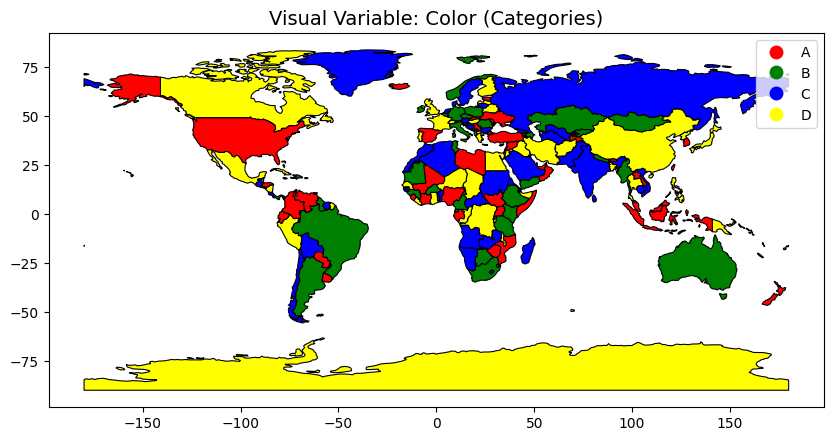

<Figure size 640x480 with 0 Axes>

In [ ]:
# 1. Color: Differentiating by category
plot_visual_variable(world, "Visual Variable: Color (Categories)", "category", cmap=ListedColormap(['red', 'green', 'blue', 'yellow']))
# Save the plot
plt.savefig('category_color_map.png', dpi=100)

In [ ]:
plt.savefig('category_color_map.png')
files.download('category_color_map.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
# 2. Size: Representing GDP by size of points (centroids of countries)
world['centroid'] = world.geometry.centroid
world['gdp'] = world['gdp_md_est'] / 1e6  # Normalize GDP to make sizes more readable


<ipython-input-7-280b4eea54c8>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['centroid'] = world.geometry.centroid


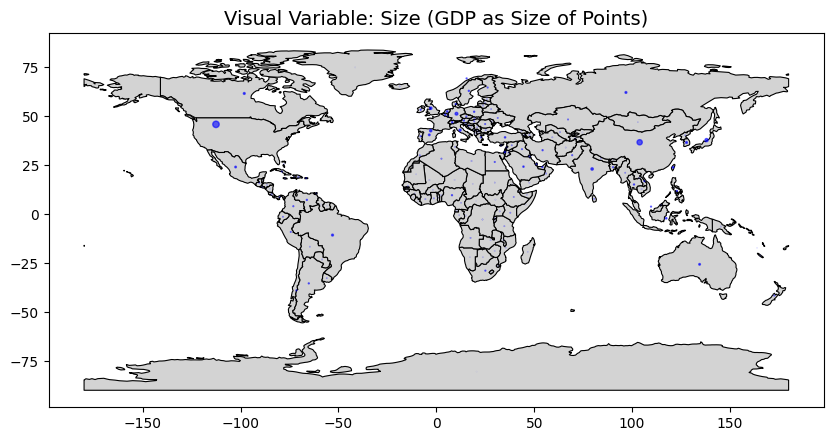

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
world.plot(ax=ax, color="lightgrey", linewidth=0.8, edgecolor="black")
world.set_geometry('centroid').plot(ax=ax, markersize=world['gdp'], color='blue', alpha=0.6)
plt.title("Visual Variable: Size (GDP as Size of Points)", fontsize=14)
plt.show()

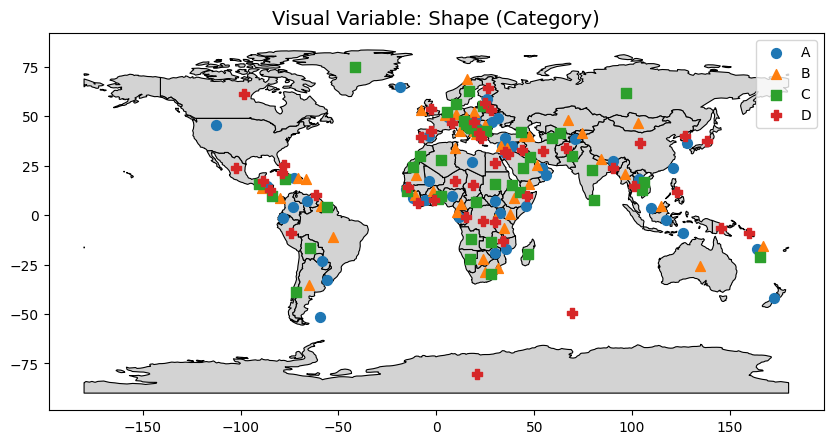

In [ ]:
# 3. Shape: Using different markers for categories (using centroids for demo)
shapes = {'A': 'o', 'B': '^', 'C': 's', 'D': 'P'}  # Different markers
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
world.plot(ax=ax, color="lightgrey", linewidth=0.8, edgecolor="black")
for category, shape in shapes.items():
    world[world['category'] == category].set_geometry('centroid').plot(ax=ax, marker=shape, markersize=50, label=category)
plt.legend()
plt.title("Visual Variable: Shape (Category)", fontsize=14)
plt.show()

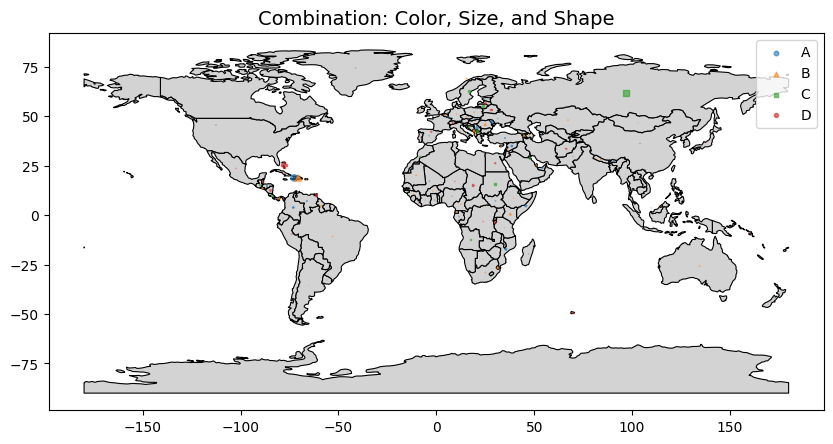

In [ ]:
# 4. Combination: Color and Size together
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
world.plot(ax=ax, color="lightgrey", linewidth=0.8, edgecolor="black")
for category, shape in shapes.items():
    world[world['category'] == category].set_geometry('centroid').plot(ax=ax, marker=shape, markersize=world['gdp'], label=category, alpha=0.6)
plt.legend()
plt.title("Combination: Color, Size, and Shape", fontsize=14)
plt.show()